In [1]:
#Read from CSV file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('WiiSportsResort.csv', sep = ',', encoding = 'latin-1')
del df['URL']

print(df)

        Run ID   User ID            User Name           Category  Hours  \
0     8y82jd1y  zx7690j7           YaBoyBTrue         All Sports    0.0   
1     8yv9o44z  18q1ewxn  broccoli_illuminati         All Sports    0.0   
2     0y6r0npy  18q1ewxn  broccoli_illuminati         All Sports    0.0   
3     pm3gk1qz  v81lq5xp             Nate9000         All Sports    0.0   
4     pzgvo1jz  zx7690j7           YaBoyBTrue         All Sports    0.0   
...        ...       ...                  ...                ...    ...   
3717  mk89qx1m  j5wv14wj        TheRoadRunner               Golf    0.0   
3718  y912j2rm  j5wv14wj        TheRoadRunner               Golf    0.0   
3719  zgv7lr0z  zx7wmv87              Plyd823               Golf    0.0   
3720  z1o19prm     ERROR         [us]Ziploc13  Beat the Champion    0.0   
3721  yd03ng0z     ERROR     [us]Attila Domos       Frisbee Golf    0.0   

      Minutes  Seconds Platform ID Platform Name  Verified        Date  
0        22.0     32.0    

In [2]:
#Clean data

df = df.loc[(df['Category'] == 'All Sports') & (df['Verified'] == 'verified') & (df['Date'].notnull())]
df = df.rename({'User Name': 'userName'}, axis=1)
df = df.sort_values(["Date"])
del df['Verified']
del df['Run ID']
del df['User ID']

totalSeconds = []

for x in range(len(df)):
    seconds = 0.0
    seconds += (df.iloc[x].Hours * 3600) + (df.iloc[x].Minutes * 60) + (df.iloc[x].Seconds)
    totalSeconds.append(seconds)

df['TimeSeconds'] = totalSeconds
df = df[['userName', 'Category', 'Hours', 'Minutes', 'Seconds', 'TimeSeconds', 'Platform Name', 'Date']]

print(df)

                 userName    Category  Hours  Minutes  Seconds  TimeSeconds  \
0              YaBoyBTrue  All Sports    0.0     22.0     32.0       1352.0   
1     broccoli_illuminati  All Sports    0.0     24.0     21.0       1461.0   
2     broccoli_illuminati  All Sports    0.0     22.0     24.0       1344.0   
2462             Nate9000  All Sports    0.0     21.0     47.0       1307.0   
2463             Nate9000  All Sports    0.0     22.0     13.0       1333.0   
...                   ...         ...    ...      ...      ...          ...   
3698               Zennan  All Sports    0.0     18.0      4.0       1084.0   
3699               Zennan  All Sports    0.0     17.0     58.0       1078.0   
3716           SpeedyClub  All Sports    0.0     19.0     12.0       1152.0   
3702           Gabe_Mingo  All Sports    0.0     23.0     28.0       1408.0   
3713           EmoadNomad  All Sports    0.0     17.0     34.0       1054.0   

     Platform Name        Date  
0              Wii

                 userName    Category  Hours  Minutes  Seconds  TimeSeconds  \
0              YaBoyBTrue  All Sports    0.0     22.0     32.0       1352.0   
2     broccoli_illuminati  All Sports    0.0     22.0     24.0       1344.0   
2462             Nate9000  All Sports    0.0     21.0     47.0       1307.0   
2464           YaBoyBTrue  All Sports    0.0     21.0     36.0       1296.0   
2461             Nate9000  All Sports    0.0     21.0      3.0       1263.0   
3                Nate9000  All Sports    0.0     19.0     26.0       1166.0   
24              Chrisoofy  All Sports    0.0     19.0     25.0       1165.0   
41             Bandow2000  All Sports    0.0     19.0      9.0       1149.0   
54          Luvbaseball58  All Sports    0.0     19.0      9.0       1149.0   
58              Chrisoofy  All Sports    0.0     19.0      9.0       1149.0   
60                 Nywaut  All Sports    0.0     19.0      6.0       1146.0   
61                 Nywaut  All Sports    0.0     18.

Text(0.5, 1.0, 'Wii Sports Resort (All Sports) World Record Progression')

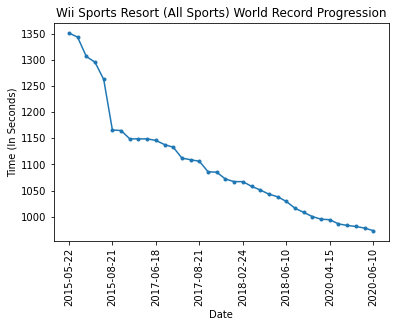

In [3]:
#Find World Record Progression

worldRecords = []
minTime = df.iloc[0].TimeSeconds

for x in range(len(df)):
    if df.iloc[x].TimeSeconds <= minTime:
        worldRecords.append(df.iloc[x])
        minTime = df.iloc[x].TimeSeconds

wrdf = pd.DataFrame(worldRecords)
print(wrdf)

wrdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Wii Sports Resort (All Sports) World Record Progression")

Number of improvements: 100
Number of same times: 71
Total runners: 171
              UserName  Fastest   First  PercentImprovement
170           TGG_Cody   1994.0  1994.0           -0.000000
68            Randomno   1200.0  1200.0           -0.000000
122       IsaacThe13th   1397.0  1397.0           -0.000000
123   defaulty_boi_777   1406.0  1406.0           -0.000000
125       JacobTelfoed   1409.0  1409.0           -0.000000
..                 ...      ...     ...                 ...
66      Matt_Landre_YT   1198.0  1761.0           31.970471
27              DerDer   1078.0  1615.0           33.250774
35             Plyd823   1110.0  1823.0           39.111355
144  FortniteSammy1000   1494.0  5507.0           72.870892
133       Kyomeka2Fake   1434.0  5521.0           74.026444

[171 rows x 4 columns]


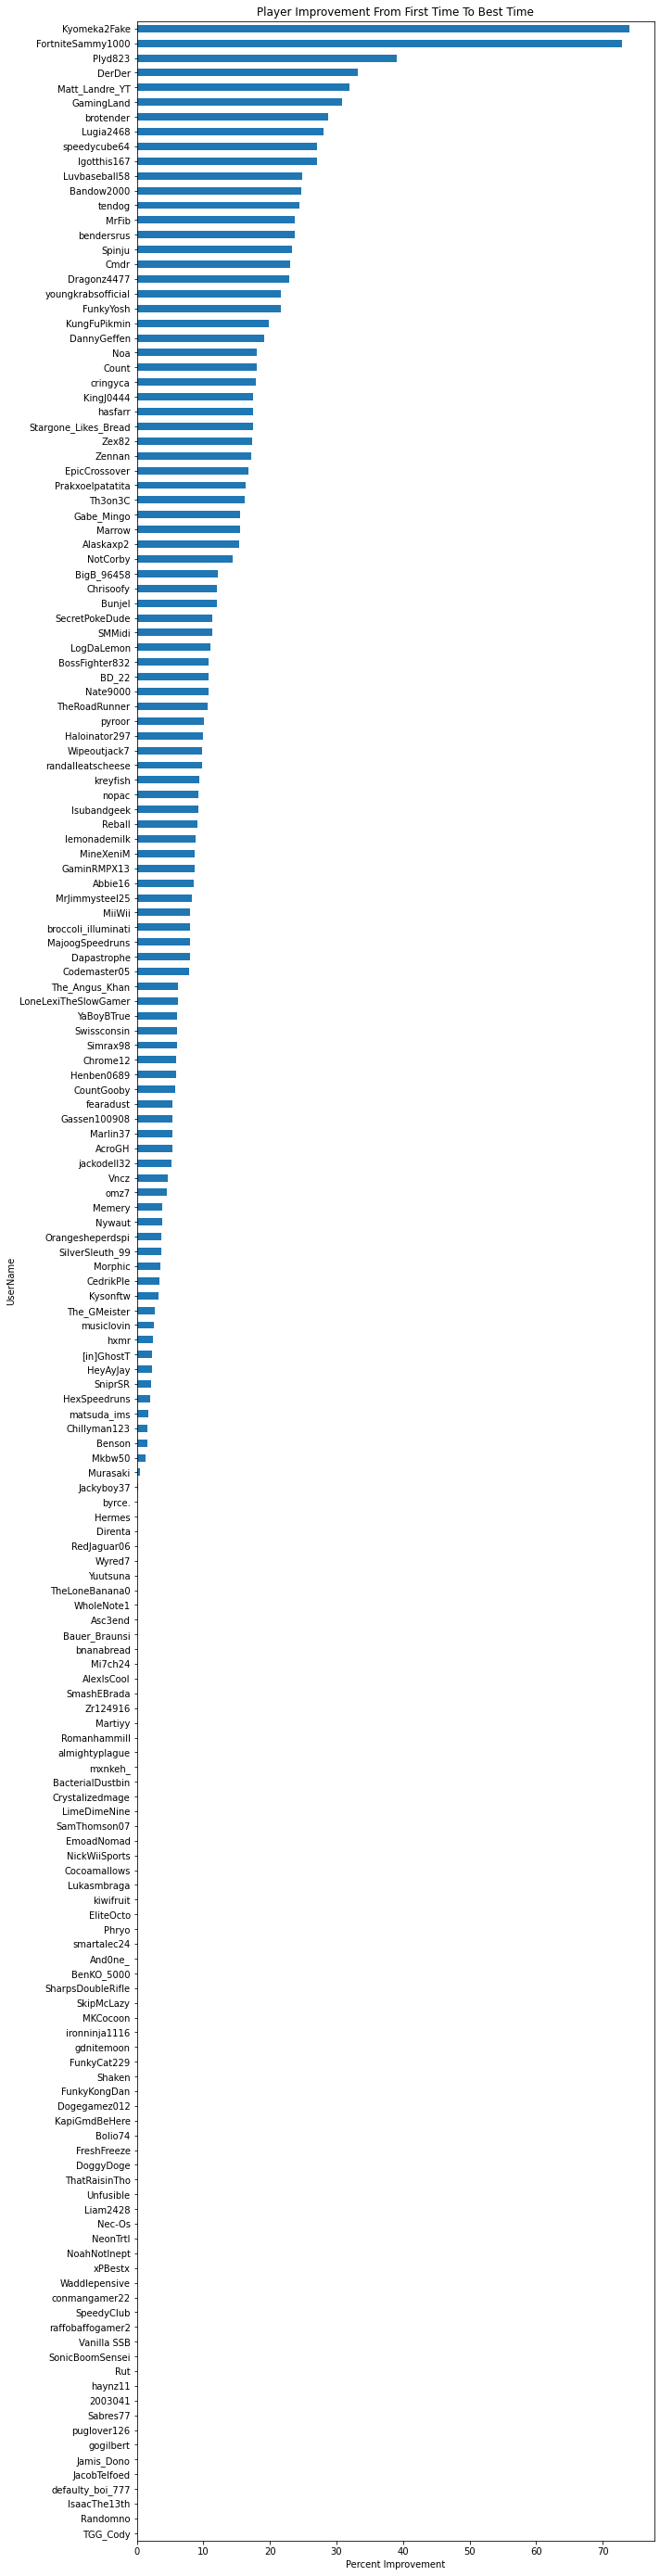

In [6]:
#Print Leadboard

rankingsFirst = df.sort_values(["Hours", "Minutes", "Seconds"])
rankingsFirst = rankingsFirst.drop_duplicates(subset = "userName")

rankingsLast = df.sort_values(["Date"])
rankingsLast = rankingsLast.drop_duplicates(subset = "userName")

quad = []

for x in range (len(rankingsFirst)):
    for y in range (len(rankingsLast)):
        if rankingsFirst.iloc[x].userName == rankingsLast.iloc[y].userName:
            fastest = rankingsFirst.iloc[x].TimeSeconds
            first = rankingsLast.iloc[y].TimeSeconds
            increase = (fastest - first) / first * 100
            increase = -increase
            quad.append((rankingsFirst.iloc[x].userName, fastest, first, increase))

count = 0
same = 0

for x in quad:
    if (x[1] < x[2]):
        count += 1
    elif (x[1] == x[2]):
        same += 1;
        
print("Number of improvements: " + str(count))
print("Number of same times: " + str(same))
print("Total runners: " + str(len(quad)))

improvementdf =  pd.DataFrame(quad, columns = ['UserName', 'Fastest', 'First', 'PercentImprovement'])
improvementdf = improvementdf.sort_values(["PercentImprovement"])
improvementdf.plot(kind = "barh", x = "UserName", y = "PercentImprovement", figsize = (10,50), legend = False)
plt.title("Player Improvement From First Time To Best Time")
plt.xlabel("Percent Improvement")
print(improvementdf)

       userName    Category  Hours  Minutes  Seconds  TimeSeconds  \
70    Alaskaxp2  All Sports    0.0     19.0      9.0       1149.0   
71    Alaskaxp2  All Sports    0.0     18.0     29.0       1109.0   
72    Alaskaxp2  All Sports    0.0     18.0     26.0       1106.0   
74    Alaskaxp2  All Sports    0.0     18.0      6.0       1086.0   
89    Alaskaxp2  All Sports    0.0     17.0     52.0       1072.0   
120   Alaskaxp2  All Sports    0.0     17.0     47.0       1067.0   
210   Alaskaxp2  All Sports    0.0     17.0     43.0       1063.0   
212   Alaskaxp2  All Sports    0.0     17.0     31.0       1051.0   
232   Alaskaxp2  All Sports    0.0     18.0     36.0       1116.0   
281   Alaskaxp2  All Sports    0.0     17.0     18.0       1038.0   
434   Alaskaxp2  All Sports    0.0     17.0      9.0       1029.0   
446   Alaskaxp2  All Sports    0.0     16.0     56.0       1016.0   
493   Alaskaxp2  All Sports    0.0     16.0     48.0       1008.0   
909   Alaskaxp2  All Sports    0.0

Text(0.5, 1.0, 'Wii Sports (All Sports) Luvbaseball58 Progression')

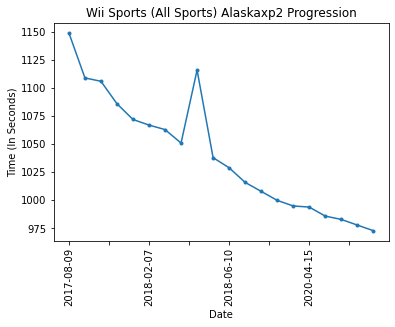

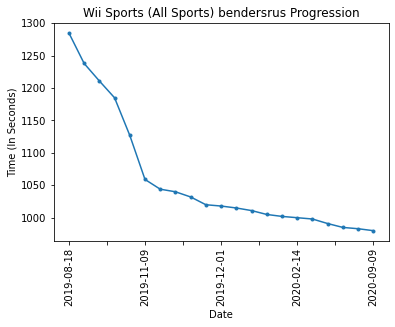

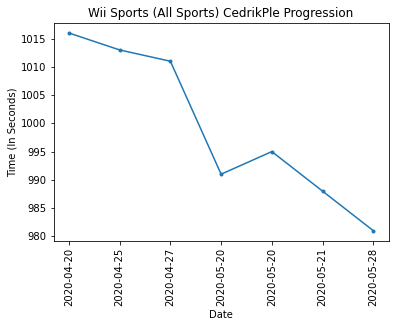

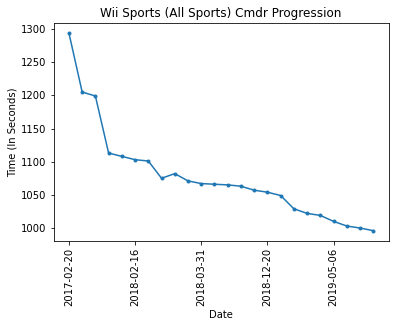

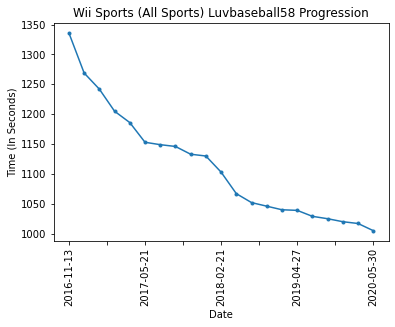

In [7]:
#Graph 5 Fastest Players

wrhdf = df.loc[df['userName'] == 'Alaskaxp2']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Wii Sports (All Sports) Alaskaxp2 Progression")

wrhdf = df.loc[df['userName'] == 'bendersrus']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Wii Sports (All Sports) bendersrus Progression")

wrhdf = df.loc[df['userName'] == 'CedrikPle']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Wii Sports (All Sports) CedrikPle Progression")

wrhdf = df.loc[df['userName'] == 'Cmdr']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Wii Sports (All Sports) Cmdr Progression")

wrhdf = df.loc[df['userName'] == 'Luvbaseball58']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Wii Sports (All Sports) Luvbaseball58 Progression")

Text(0.5, 1.0, 'WiiSports Platform Distribution')

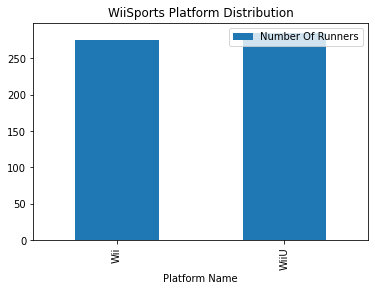

In [8]:

wiiCount = np.count_nonzero(df['Platform Name']=='Wii')
wiiUCount = np.count_nonzero(df['Platform Name']=='WiiU')

platformsArray = ([ ['Wii', wiiCount], ['WiiU', wiiUCount]])
platformdf = pd.DataFrame(data = platformsArray, columns = ['Platform Name', 'Number Of Runners'])

platformdf.plot(kind = 'bar', x='Platform Name', y='Number Of Runners', legend = True)
plt.title("WiiSports Platform Distribution")

Text(0.5, 1.0, 'Spelunky Quantity of Runs by Year')

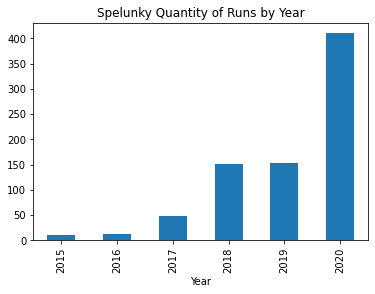

In [10]:
count2015 = np.count_nonzero(df['Date'] < '2016-01-01')
count2016 = np.count_nonzero(df['Date'] < '2017-01-01') - count2015
count2017 = np.count_nonzero(df['Date'] < '2018-01-01') - count2016
count2018 = np.count_nonzero(df['Date'] < '2019-01-01') - count2017
count2019 = np.count_nonzero(df['Date'] < '2020-01-01') - count2018
count2020 = np.count_nonzero(df['Date']) - count2019

monthsArray = ([ ['2015', count2015], ['2016', count2016], ['2017', count2017], ['2018', count2018], ['2019', count2019], ['2020', count2020]])
monthsdf = pd.DataFrame(data = monthsArray, columns = ['Year', 'Number of Runs Submitted'])

monthsdf.plot(kind = 'bar', x = 'Year', y='Number of Runs Submitted', legend = False)
plt.title("Spelunky Quantity of Runs by Year")